# Einstein vs SKLearn 
## Comparison of SalesForce Einstein vs. SKLearn for Predictions
## NeuralFizz Project

This project is a comparison of the predictive cababilities between SalesForce Einstein's predictions and the use of SKLearn and a set of different algorithms to perform the same predictions.  This is a supporting project for the post at https://www.neuralfizz.com/home/can-salesforce-einstein-help-you-make-better-predictions.  The full explanation and conclusions can be seen there. 

Within this notebook we evaluate the results of the predictions from SalesForce.com and also run a model using SKLearn to compare the model results.  


## Data Exploration
SalesForce.com Einstein has a sample project to test out and see how their system can predict the value of a field based on a set of other labels.  

The key fields are:

Feature: Application Name (Text)
Feature: Candidate Name (Text)
Label : Accepted Offer - Yes/No/Unlabeled

Output: Predicted Likelihood to Accept Offer- Numeric percentage field (0-100%)

SalesForce Einstein takes the features, uses the Accepted Offer label to learn wich candidates are more or less likely to accept the offer and then creates a prediction in the Predicted Likelihood to Accept Offer field.  This 

- Total Number of Fields in Data Set: 100
- Total Fields with Predictions: 48
- Total Accepted Yes Predictions: 26
- Total Accepted No Predictions: 22

The data set size is very small and the number of fields being used for predictions is also small.  It is unclear whether or not there is any real predictive ability within this data set.  

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import the data set

# Display Summary Data
df = pd.read_csv("SF Prediction Data.csv")

display(df.head(n=1))

d:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Candidate Name,Predicted Likelihood to Accept Offer,Accepted Offer,Application Status,Degree,Degree Field,Mailing City,Mailing State,Mailing Street,Postal Code
0,Andy Ruiz,25,Yes,Accepted Offer,Bachelors,Computer Science,San Jose,CA,12380 Grant St.,94206


## Data Exploration SalesForce Predictions
Once you have your data setup within SalesForce, SalesForce Einstein it will automatically make predictions on that data.  It takes the fields setup to be predicted on and then enters it's predictions into the `Predicted Liklihood to Accept an Offer` Field.  The predictions bucket into either 25% or 90% representing NO or Yes.

The SalesForce predictions were:

25% - 91 Predictions
90% - 9 Predictions

So in essence 9 candidates were predicted to accept the offer. 

Looking at the data further,we note that predictions were created for both the data where there was labels (48 fields) and no labels (52 fields).  That data broke down as

Accepted offer Label No : 
-    25% : 21
-    90% : 1

Accepted offer Label Yes : 
-    25% : 23
-    90% : 3

No Label Predictions:
-    25% : 47
-    90% : 5
    
Given this information we can assume then that the 48 fields were used for training and get accuracy and metric scores based on that data.   Assuming that 25% means we are predicting a No acceptance and 90% means we are predicting a Yes acceptance the following Confusion Matrix can be defined.

| n=48 | 25% | 90% |
| :-------------: | :--------: |:---------:|
| NO  | 21 | 1|
| YES | 23 | 3|
||44|4|

|Metric|Value|Calculation|
|:------------:|:----:|
|True Positives| 3|TP|
|True Negatives| 21|TN|
|False Positives|1|FP|
|False Negatives|23|FN|
|Accuracy| 0.5 | (TP+TN)/(Total)|
|Precision|0.75 | TP/(TP+FP)|
|Recall |0.11 |TP/(TP+FN)|


Note that Precision is telling us **"Of the Yes predictions, how accurate were they?"**, while Recall is telling us **"Of all the Yes answers, how many were predicted correctly"**.  As can be seen from this data, Precision was about 75% while Recall was very low at 11%. 




## Implementation: Create Train/Test data on the 2 features

- Create train/test (randomize data)
- Build up a simple Decision Tree
- Train models (what is their accuracy?)
- Predict Data - what is the accuracy?
- Predict on the generalized data set (no labels) - how does it compare to SF?


In [2]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reduce data down to the fields we care about
features = df[['Application Status','Candidate Name']]
labels = df[['Accepted Offer']]

# Encode the data
featuresEnc = pd.get_dummies(features)

# Merge data back together so we have a master set with the encoding (this will be used later when we predict on the data without labels)
masterDF = pd.concat([featuresEnc,labels],axis=1)

# Turn AcceptedOffer into 0's, 1's and NaN's
masterDF['Accepted Offer'] = masterDF['Accepted Offer'].replace(['Yes'],1)
masterDF['Accepted Offer'] = masterDF['Accepted Offer'].replace(['No'],0)

# Split data-set by lebeled and not labeled (General)
labeledDF = masterDF[masterDF['Accepted Offer'].notnull()]
generalDF = masterDF[masterDF['Accepted Offer'].isnull()]
print "Number Labeled Items {}".format(len(labeledDF))
print "Number Unlabeled Items {}".format(len(generalDF))

## Pull out just the 2 fields we require
finalLabels = labeledDF[['Accepted Offer']]
finalFeatures = labeledDF.drop(['Accepted Offer'],axis=1)

print("\nFeatures")
display(finalFeatures.head(n=1))
print("\n\nLabels")
display(finalLabels.head(n=1))

## Create Train/Test Data
X_train, X_test, y_train, y_test = train_test_split(finalFeatures, finalLabels, test_size=0.2, random_state=42)


Number Labeled Items 48
Number Unlabeled Items 52

Features


,Application Status_Accepted Offer,Application Status_Applied,Application Status_Offer Made,Application Status_Rejected Offer,Candidate Name_Adam Vaughn,Candidate Name_Agnes Miller,Candidate Name_Alma Santiago,Candidate Name_Andy Ruiz,Candidate Name_Anna Watts,Candidate Name_Annette Griffith,...,Candidate Name_Suzanne Moran,Candidate Name_Teresa Castro,Candidate Name_Timmy Wheeler,Candidate Name_Todd Clark,Candidate Name_Tommie Cortez,Candidate Name_Toni Caldwell,Candidate Name_Tonya Banks,Candidate Name_Vicki Porter,Candidate Name_Vincent Garza,Candidate Name_Virginia Greene
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0




Labels


,Accepted Offer
0,1.0


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf = DecisionTreeClassifier(criterion = "gini", random_state = 142, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

# Make Predictions on train (how does it do here?)
y_train_pred = clf.predict(X_train)
#for i in range(len(y_train)):
#    print("y_train[{}]={} pred[{}]={} ".format(i,y_train.iloc[i,0],i,y_train_pred[i]))

# Make Prediction on test
y_test_pred = clf.predict(X_test)

# Calculate accuracy 
print "Train Accuracy is ", accuracy_score(y_train,y_train_pred)*100
print "Test Accuracy is ", accuracy_score(y_test,y_test_pred)*100


Train Accuracy is  100.0
Test Accuracy is  100.0


## Initial Results
The initial accuracy results are **100%**.  This is a gigantic red-flag when looking at any data set.  However, it's not surprising given how the data was created.  Let's look at this in more detail. 

The Features being used to predict are Candidate Name and Application Status.  However, when you reduce the data down to the 48 fields that can be used for training and testing you see that the lable (Accepted Offer) has a 1 to 1 correlation with the Application Status field.  Instead of using machine learning this could be reduced to the simple rule 

- If Applicants accepted status is Accepted Offer then Accepted Offer is equal to yes
- If Applications accepted status is Rejected Offer then Accepted Offer is equal to no

We could have figured this out initially just by looking at our two fields.  The fields being used to predict on are a Name Field, which is different for every student, and the Application Status itself.  Note that Application Status is both a field they are predicting on AND the field you are trying to predict for!  So you are essentially encoding your predictions directly into your model.  What good is that?  Additionally when we go out to predict on the generalized data the data values within the Application Status field are "Offer Made" or "Applied".  They don't exist within the training data at all, so how would the algorithms learn to predict on them?

So either the system is essentially random (trying to figure out how to predict if a student will accept based on their name) OR it's using more than just the two fields setup in the predictions.  SalesForce Einstein is very opaque on what they are doing behind the scenes, they just say things like "we have a ton of data, build our models around that and leverage those models on your predictions". 

What's also interesting is that given the lables are actually encoded into the features directly, SalesForce predictions in the `Predicted Likelihood to Accept Offer` field are not 100% accurate on the fields that have `Accepted Offer` or `Rejected Offer` within the Application Status field.  This would indicate that something else is really going on behind the scenes. 

So....  Let's try a more robust model where we used more of the features to try and predict the outcome. 

## Implementation 2: Create Train/Test data on more features
Looking at the data set there are a number of other fields that we could use to predict upon.  For instance there in informaiton on which field they are applying for, which degree, where they are from, etc..   Intuitively it would seem that some of these fields could be **much** more predictive than Application Status and Name.  For instance if the college is in San Francisco, someone in San Jose may be more likely to accept than someone in, say, Chicago.  

So looking at the data we see a few things.  First, everyone has a Mailing State of CA.  Well that means, for this test, that the field really is not usefull.  Degree Field is Computer Science, Electrical Engineering, Mathematics and Mechanical Engineering.  This could be good data.  Also the Degree type (Bachelors, Ph.D., Masters) is a helpful field.  After analyzing the data we will use the following fields for this prediction.

- `Degree`: Values of Bachelors, Ph.D, and Masters
- `Degree Field` : Values of Computer Science, Electrical Engineering, Mathematics and Mechanical Engineerings
- `Mailing City`: Many different values but city may correlate to likelihood to accept. 
- `Postal Code`: A bit more general than Mailing City and it may be dupicative.  This could have the effect of essentially enhancing the effect of location on the model.  Let's see!

>**Note:** that we are NOT using the Application Status or Canidate Name field.  This is because Application Stutus essentially IS the label.  Additionally it is also hard to understand how name would help the model predict.  


In [4]:
# Reduce data down to the fields we care about
features = df[['Degree','Degree Field','Mailing City','Postal Code']]
labels = df[['Accepted Offer']]
likelihood = df[['Predicted Likelihood to Accept Offer']]

# Encode the data
featuresEnc = pd.get_dummies(features)

# Merge data back together so we have a master set with the encoding (this will be used later when we predict on the data without labels)
masterDF = pd.concat([featuresEnc,labels],axis=1)
masterDF = pd.concat([masterDF,likelihood],axis=1)  # Keep likelihood attached for later processing

# Turn AcceptedOffer into 0's, 1's and NaN's
masterDF['Accepted Offer'] = masterDF['Accepted Offer'].replace(['Yes'],1)
masterDF['Accepted Offer'] = masterDF['Accepted Offer'].replace(['No'],0)

# Turn likelihood into 0's and 1's 
masterDF['predicted'] = np.where(masterDF['Predicted Likelihood to Accept Offer']>=50, 1, 0)

# Split data-set by lebeled and not labeled (General)
labeledDF = masterDF[masterDF['Accepted Offer'].notnull()]
generalDF = masterDF[masterDF['Accepted Offer'].isnull()]
print "Number Labeled Items {}".format(len(labeledDF))
print "Number Unlabeled Items {}".format(len(generalDF))

## Seperate out the features and the labels
finalLabels = labeledDF[['Accepted Offer']]
finalFeatures = labeledDF.drop(['Accepted Offer'],axis=1)
finalFeatures = finalFeatures.drop(['Predicted Likelihood to Accept Offer'],axis=1)
finalFeatures = finalFeatures.drop(['predicted'],axis=1)

print("\nFeatures")
display(finalFeatures.head(n=1))
print("\n\nLabels")
display(finalLabels.head(n=1))


## Create Train/Test Data
X_train, X_test, y_train, y_test = train_test_split(finalFeatures, finalLabels, test_size=0.2, random_state=42)


Number Labeled Items 48
Number Unlabeled Items 52

Features


,Postal Code,Degree_Bachelors,Degree_Masters,Degree_Ph.D.,Degree Field_Computer Science,Degree Field_Electrical Engineering,Degree Field_Mathematics,Degree Field_Mechanical Engineering,Mailing City_Fairfield,Mailing City_Folsom,Mailing City_San Diego,Mailing City_San Francisco,Mailing City_San Jose,Mailing City_Turlock
0,94206,1,0,0,1,0,0,0,0,0,0,0,1,0




Labels


,Accepted Offer
0,1.0


In [5]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 142, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

# Make Predictions on train (how does it do here?)
y_train_pred = clf.predict(X_train)

# Make Prediction on test
y_test_pred = clf.predict(X_test)

# Calculate accuracy 
print "Train Accuracy is ", accuracy_score(y_train,y_train_pred)*100
print "Test Accuracy is ", accuracy_score(y_test,y_test_pred)*100


Train Accuracy is  65.7894736842
Test Accuracy is  40.0


### Results: 
OK now we are getting somewhere.  Training accuracy is 65% and Test accuracy is 40%.  Not the best, but indicates that we are able to get to some level of predictions based on the data.  Now we could spend some cycles on trying to optimize the algorithms, get higher accuracy, etc..  However, given the nature of this exploration and the limited amount of data we are going to forego that for now.  We will, however, look at the confusion matrix and see how our recall and precision look. 

True Positives: 2
True Negatives: 2
False Positives: 4
False Negatives: 2
Accuracy: 0.4
Precision: 0.333333333333
recall: 0.5


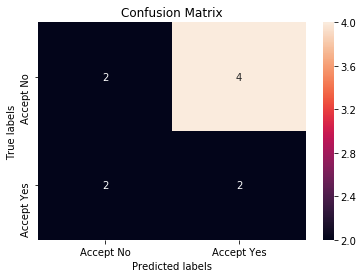

In [6]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print "True Positives:",tp
print "True Negatives:",tn
print "False Positives:",fp
print "False Negatives:",fn

accuracy = (tp+tn)/float((tp+tn+fp+fn))
precision= tp/float((tp+fp))
recall =  tp/float((tp+fn))

print "Accuracy:",accuracy
print "Precision:",precision
print "recall:",recall

cm = confusion_matrix(y_test,y_test_pred)


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accept No', 'Accept Yes']); ax.yaxis.set_ticklabels(['Accept No', 'Accept Yes']);

plt.show()

In [7]:
# Compare original SF predictions on all general fields to our model, how do they compare?

sfPred = generalDF['predicted']
print sfPred.ravel()

## Seperate out the features and the labels
genFeatures = generalDF.drop(['Accepted Offer'],axis=1)
genFeatures = genFeatures.drop(['predicted'],axis=1)
genFeatures = genFeatures.drop(['Predicted Likelihood to Accept Offer'],axis=1)

display(genFeatures.head())

# Predict values for general features
y_gen_pred = clf.predict(genFeatures)

display(y_gen_pred)
# Compare predictions vs. SF predcitions (in predicted column)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1]


,Postal Code,Degree_Bachelors,Degree_Masters,Degree_Ph.D.,Degree Field_Computer Science,Degree Field_Electrical Engineering,Degree Field_Mathematics,Degree Field_Mechanical Engineering,Mailing City_Fairfield,Mailing City_Folsom,Mailing City_San Diego,Mailing City_San Francisco,Mailing City_San Jose,Mailing City_Turlock
2,94322,0,0,1,1,0,0,0,0,1,0,0,0,0
8,94286,0,1,0,1,0,0,0,0,1,0,0,0,0
9,94125,0,1,0,1,0,0,0,1,0,0,0,0,0
10,94282,1,0,0,1,0,0,0,0,1,0,0,0,0
11,94257,0,1,0,1,0,0,0,0,0,0,1,0,0


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Feature Importance###
Look at the importance of the different features and compare back to the labels.  Note that the labels were one-hot encoded so each potential value shows up as a feature. 

In [8]:
importances = clf.feature_importances_

cols = X_train.columns
col2 = genFeatures.columns
for i in range(len(importances)):
    print cols[i]," importance: ",importances[i]
    


Postal Code  importance:  0.206378772234
Degree_Bachelors  importance:  0.0
Degree_Masters  importance:  0.0
Degree_Ph.D.  importance:  0.0
Degree Field_Computer Science  importance:  0.0
Degree Field_Electrical Engineering  importance:  0.274599633761
Degree Field_Mathematics  importance:  0.519021594004
Degree Field_Mechanical Engineering  importance:  0.0
Mailing City_Fairfield  importance:  0.0
Mailing City_Folsom  importance:  0.0
Mailing City_San Diego  importance:  0.0
Mailing City_San Francisco  importance:  0.0
Mailing City_San Jose  importance:  0.0
Mailing City_Turlock  importance:  0.0


## References and Resources ##
This project makes use of resources from:

- <A href="http://scikit-learn.org/stable/">scikit-learn</a>
- <A href="https://seaborn.pydata.org/">Seaborn Statistical Package</a>
- <A href="https://matplotlib.org/">MatPlotLib</a>

Additionally the original data-set is the publicly available test data at SalesForce.com Trailhead for the <a href="https://trailhead.salesforce.com/en/trails/get_smart_einstein">Einstein</a> service. 
